# MPG Dataset (Miles Per Gallon)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = sns.load_dataset('mpg')
df = df.dropna()

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 1. Quelles sont les variables discrètes et continues de ce dataset ?
 - Discrète : cylinders, model_year, origin, name
 - Continue : mpg, displacement, horsepower, weight, acceleration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [6]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
origin            3
name            301
dtype: int64

## 2. Analysez la variable mpg.

- Tous les modèles de voitures du jeu de données, datant de 1972 à 1982, parcourt en moyenne 23.5 milles pour un gallon
- Ecart-type égal à 7.8 -> La dispersion du jeu de données n'est pas négligeable !
- Le modèle le plus performant a 46 mpg. Quel est ce modèle ? Quel est son origin ?
- Le modèle le moins performant en 9 mpg. Quel est ce modèle ? Quel est son origin ?
- La mediane est très proche de la moyenne. La distribution du jeu de données est probablement symétrique ?

In [7]:
df['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

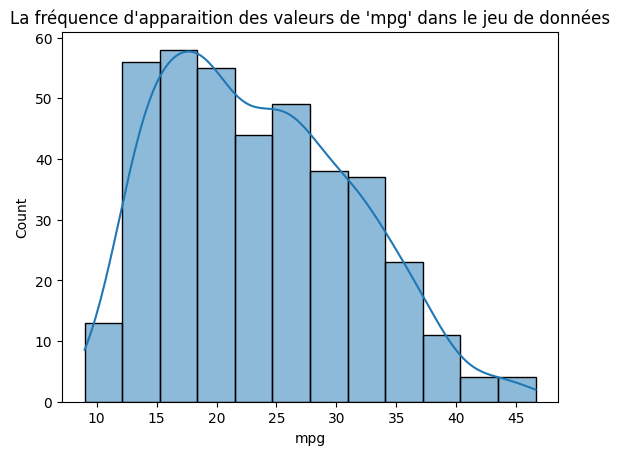

In [8]:
sns.histplot(data=df, x='mpg', kde=True)
plt.title("La fréquence d'apparaition des valeurs de 'mpg' dans le jeu de données")
plt.show()

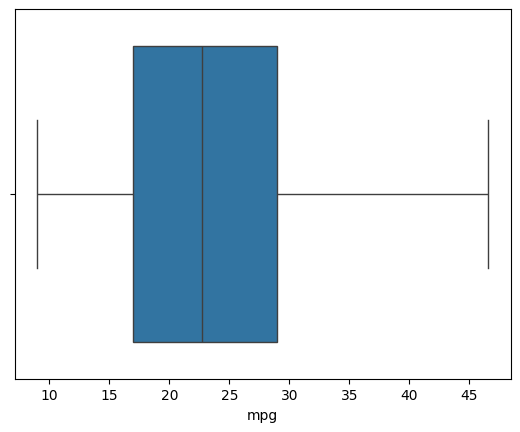

In [9]:
sns.boxplot(data=df, x='mpg')
plt.show()

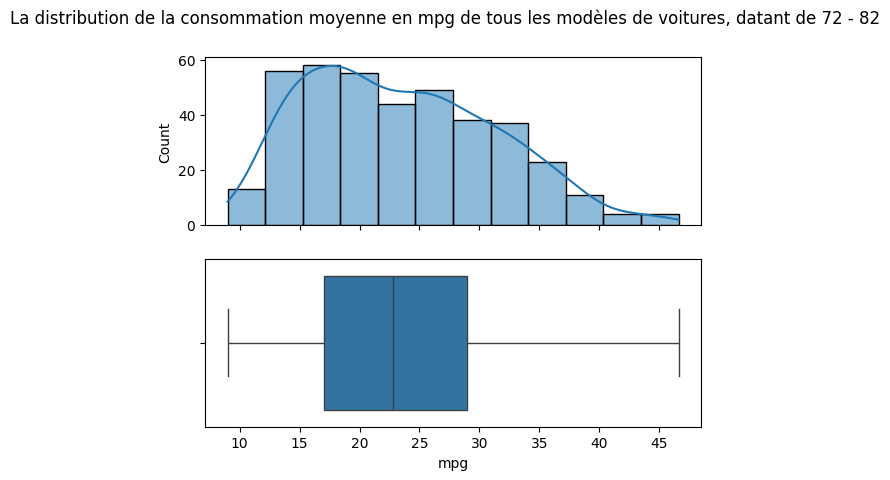

In [10]:
fig, ax = plt.subplots(2, 1, sharex=True)
plt.suptitle("La distribution de la consommation moyenne en mpg de tous les modèles de voitures, datant de 72 - 82")
sns.histplot(data=df, x='mpg', kde=True, ax=ax[0])
sns.boxplot(data=df, x='mpg', ax=ax[1])
plt.show()

## 3. Analysez la variable "cylinders"
 - Plus de 50% de modèles de voitures ont 4 cylindres. Est-ce la meilleure configuration ?
 - Plus de 99% de modèles de voitures ont un nombre de cylindres pair (4, 6 ou 8). Les modèles avec 3 et 5 cylindres sont-ils moins performants ?

In [11]:
df['cylinders'].value_counts(normalize=True).round(2).sort_index()

cylinders
3    0.01
4    0.51
5    0.01
6    0.21
8    0.26
Name: proportion, dtype: float64

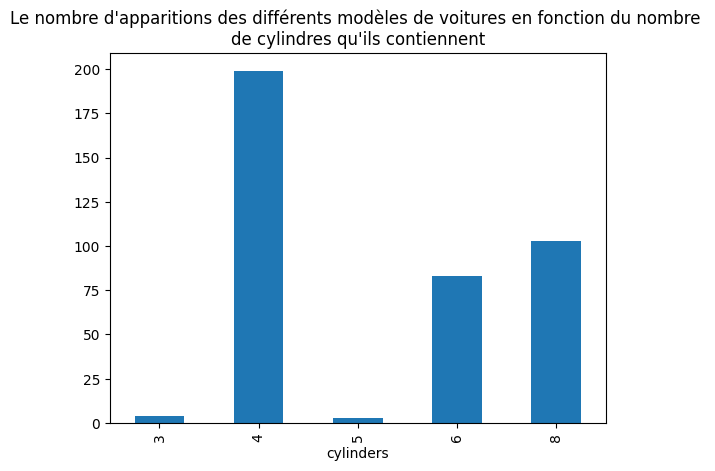

In [12]:
df['cylinders'].value_counts().sort_index().plot.bar()
plt.title("Le nombre d'apparitions des différents modèles de voitures en fonction du nombre \nde cylindres qu'ils contiennent" )
plt.show()

## 4. Analysez la variable "origin"
 - Plus de 60% de modèles de voitures présent dans le jeu de données sont fabriqués aux États-Unis

In [13]:
df['origin'].value_counts(normalize=True).round(2)

origin
usa       0.62
japan     0.20
europe    0.17
Name: proportion, dtype: float64

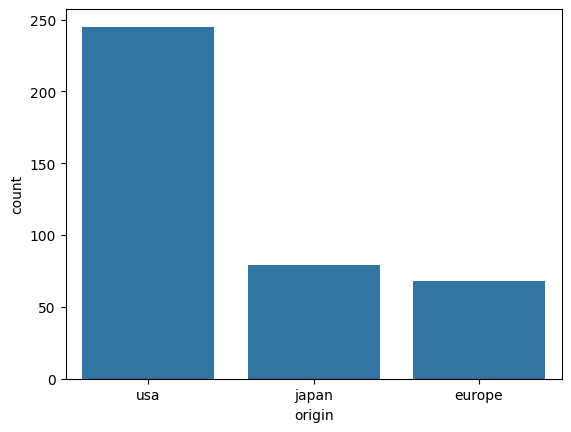

In [14]:
sns.countplot(data=df, x='origin')
plt.show()

## 5. Observez l'évolution de la consommation des voitures (mpg) par rapport au nombre de chevaux (horsepower) 
 - La distance parcourue en mile par les véhicules pour un gallon diminue à mesure que la puissance des véhicules augmente. Cette diminution n'est pas linéaire, mains suit une tandance quadratique.
 - Il semble que les véhicules les plus récents, ceux datant de 80 à 82, sont en général les plus performants en termes de distance parcounue par gallon

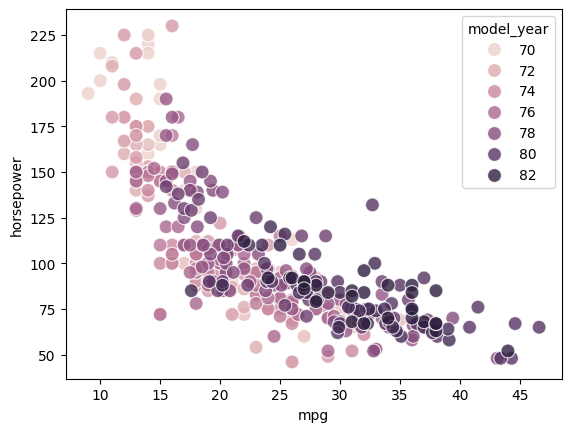

In [15]:
sns.scatterplot(data=df, x='mpg', y='horsepower', hue='model_year', s=100, alpha=0.8)
plt.show()

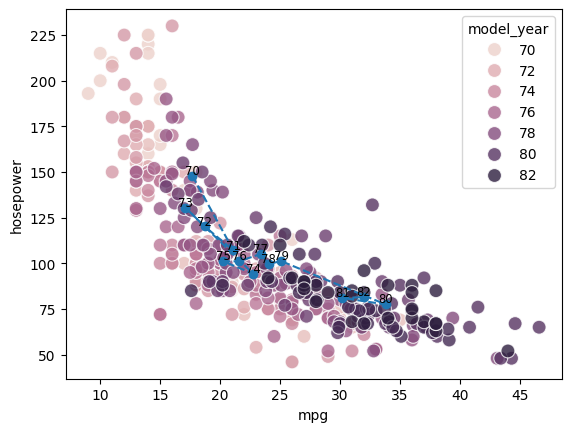

In [16]:
temp_df = df.groupby('model_year')[['mpg', 'horsepower']].mean()

plt.plot(temp_df['mpg'], temp_df['horsepower'], '--o')
plt.xlabel('mpg')
plt.ylabel('hosepower')

sns.scatterplot(data=df, x='mpg', y='horsepower', hue='model_year', s=100, alpha=0.8)

# Ajout des annotations pour chaque point
for i, row in temp_df.iterrows():
    plt.text(row['mpg'], row['horsepower'] + 1, i, ha='center', fontsize='small', color='black')

## Observez l'évolution du poids moyen des voitures américaines de l'année 70 jusqu'à l'année 82.

- Le poids moyen des véhicules aux Etats-Unis a diminué au fil du temps, de 1970 à 1982
- Le poids moyen des véhicules en Europe augmente un petit peu, et au Japan est resté relativement stable ?



In [17]:
usa = df.query("origin=='usa'").groupby('model_year')['weight'].mean()

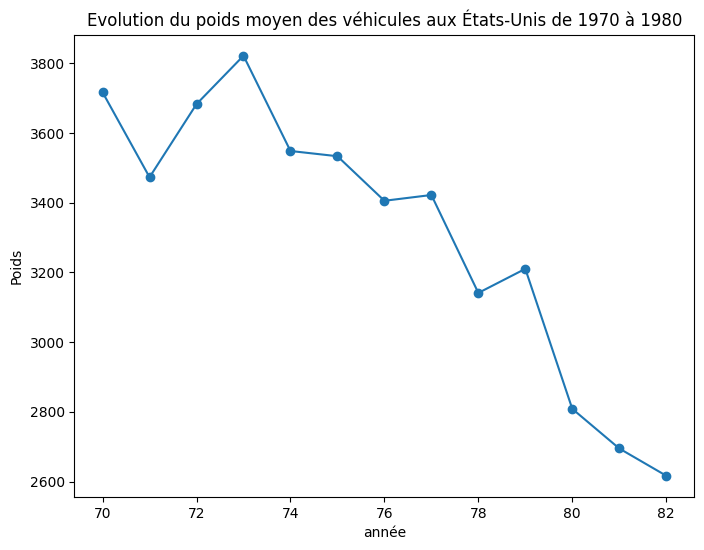

In [18]:
#fig, ax = plt.subplots(3, 1, sharex=True, figsize=(6, 12))
plt.figure(figsize=(8, 6))
plt.title('Evolution du poids moyen des véhicules aux États-Unis de 1970 à 1980')
plt.plot(usa.index, usa.values, '-o')
plt.xlabel('année')
plt.ylabel('Poids')

plt.show()


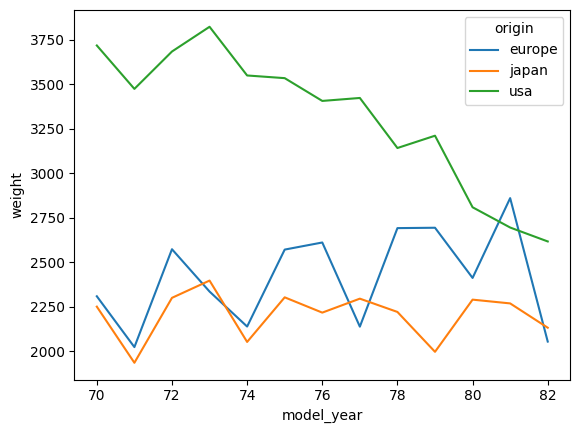

In [19]:
data = df.groupby(['origin', 'model_year'])['weight'].mean().reset_index()

sns.lineplot(data=data, x='model_year', y='weight', hue='origin' )

plt.show()

## 7. Analysez la relation entre le nombre de cylindres et l'année du modèle.

In [20]:
pd.crosstab(df['model_year'], [df['cylinders']])

cylinders,3,4,5,6,8
model_year,,,,,
70,0,7,0,4,18
71,0,12,0,8,7
72,1,14,0,0,13
73,1,11,0,8,20
74,0,15,0,6,5
75,0,12,0,12,6
76,0,15,0,10,9
77,1,14,0,5,8
78,0,17,1,12,6


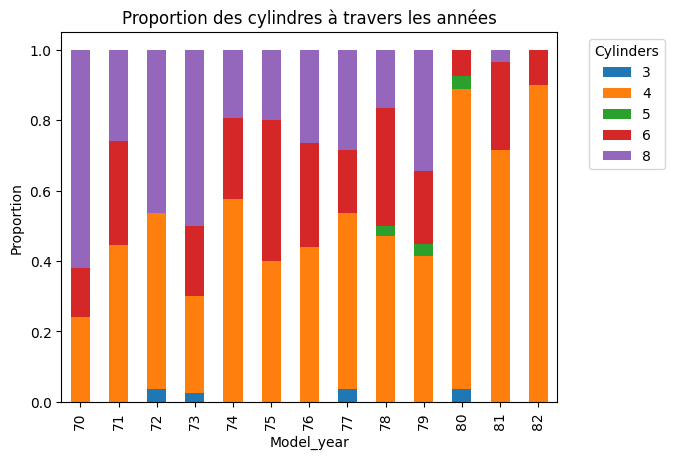

In [21]:
pd.crosstab(df['model_year'], [df['cylinders']],  normalize='index').plot(kind='bar', stacked=True)
plt.xlabel('Model_year')
plt.ylabel('Proportion')
plt.title('Proportion des cylindres à travers les années')

plt.legend(title='Cylinders', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Il semblerait qu'il ait de moins en moins de 8 cylindres
- Et de plus en plus de 4 cylindres
- sur l'ensemble du jeu de données (Tout pays confondu)

## 8. Analysez la relation entre le nombre de cylindres et l'origine.

- Les États-Unis, Japon et Europe ont un nombre équivalent 4 cylindres entre 1970 et 1982
- Les véhicules de 3 cylindres ont été uniquement fabriqués au Japon durant cette période, mais en faible quantité
- Ceux à 5 cylindres ont été uniquement produit en Europe,  également en faible quantité
- Enfin les véhicules à 8 cylindres ont été exclusivement fabriqués aux États-Unis, en grande quantité

In [22]:
pd.crosstab(df['origin'], [df['cylinders']])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,61,3,4,0
japan,4,69,0,6,0
usa,0,69,0,73,103


## 9. Quelle est l'accélération moyenne des voitures des différents pays ?

In [23]:
df.groupby('origin')['acceleration'].mean().round(2)

origin
europe    16.79
japan     16.17
usa       14.99
Name: acceleration, dtype: float64

- L'accélération moyenne des véhicules semble être la même en Europe et au Japon, mais elle semble être fiable aux USA

## 10. Quelle est-elle pour les modèles de l'année 80 ?

In [24]:
df.query("model_year == 80").groupby('origin')['acceleration'].mean().round(2)

origin
europe    18.50
japan     16.02
usa       17.22
Name: acceleration, dtype: float64

## 11. Au final Il semblerait qu'une tendance se dégage à travers le temps...
- Le poids moyen des véhicules aux Etats-Unis a diminué au fil du temps, de 1970 à 1982. Le poids moyen des véhicules en Europe et au Japan est resté relativement stable sur cette période.
- L'accélération moyenne des véhicules a augmenté à partir des années 1980, en Europe et aux États-Unis. En revanche, celle du Japon est resté relativement stable
- La puissance des véhicules diminue au fil du temps, de 1970 à 1982, aux États-Unis, en Europe et au Japon
- La distance parcourue pour un gallon des véhicules augmente au fil du temps, de 1970 à 1982, aux États-Unis, en Europe et au Japon
-  Le volume des moteurs a diminu au fil du temps, pour les véhicules produits aux États-Unis. En revanche, celui des véhicules produits en Europe et au Japon est resté relativement stable 

In [25]:
df_group = df.groupby(['model_year'])[['horsepower', 'mpg', 'displacement', 'weight', 'acceleration']].mean().reset_index()

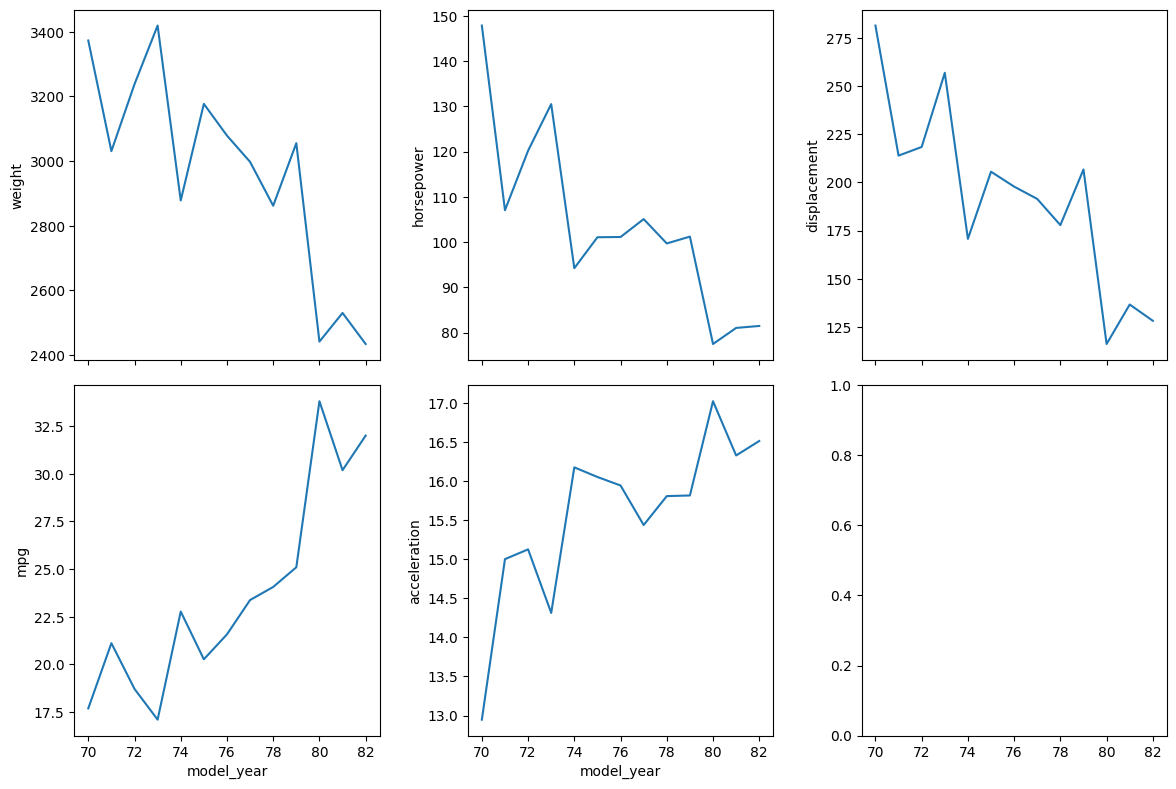

In [26]:
fig, ax = plt.subplots(2, 3, sharex=True, figsize=(12, 8))
sns.lineplot(data=df_group, x='model_year', y='weight', ax=ax[0, 0])
sns.lineplot(data=df_group, x='model_year', y='horsepower', ax=ax[0, 1])
sns.lineplot(data=df_group, x='model_year', y='displacement', ax=ax[0, 2])
sns.lineplot(data=df_group, x='model_year', y='mpg', ax=ax[1, 0])
sns.lineplot(data=df_group, x='model_year', y='acceleration', ax=ax[1, 1])

plt.tight_layout()
plt.show()


<Axes: xlabel='model_year'>

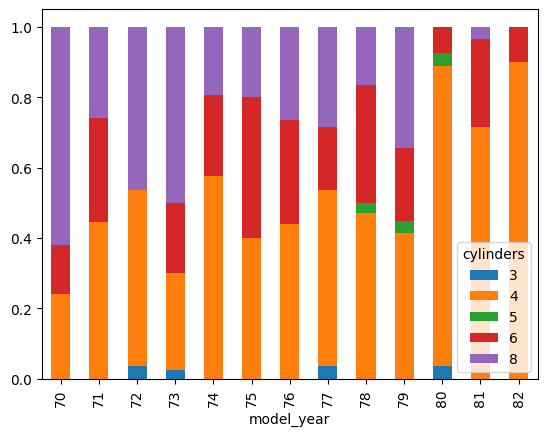

In [27]:
pd.crosstab(df['model_year'], df['cylinders'], normalize='index').plot(kind='bar', stacked=True)

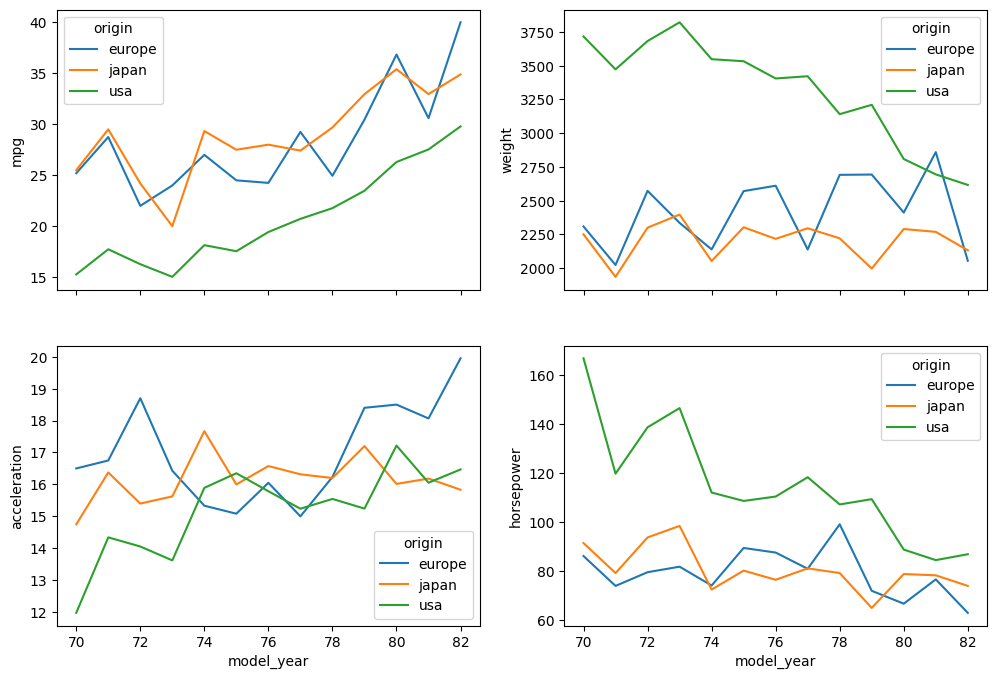

In [28]:
df_temp = df.groupby(['model_year', 'origin'])[['mpg', 'weight', 'horsepower', 'acceleration']].mean().reset_index()
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(12, 8))
sns.lineplot(data=df_temp, x='model_year', y='mpg', hue='origin', ax=ax[0, 0])
sns.lineplot(data=df_temp, x='model_year', y='weight', hue='origin', ax=ax[0, 1])
sns.lineplot(data=df_temp, x='model_year', y='acceleration', hue='origin', ax=ax[1, 0])
sns.lineplot(data=df_temp, x='model_year', y='horsepower', hue='origin', ax=ax[1, 1])

plt.show()

- Au fil du temps, le poids moyen des véhicules diminue
   - Pour tous les pays ? Non, Suelement aux USA (mais c'est lié au diminution des 8 cylindres -> qui sont les plus lourdes!)
   - Pour tous les cylindres ? Non
- Au fil du temps, la puissance moyenne des véhicule diminue
- A travers le temps, le volume des véhicules diminue
- Au fil du temps, l'autonomie des véhicules augmente
   - Pour tous pays ? Oui
   - Pour tous les cylindres ? Oui
- A travers le temps, l'accélération moyenne des véhicules augmente
- Au fil du temps, il y a de plus en plus des véhicules à 4 cylindres, et de moins en moins des véhicules à 8 cylindres

# Tests hypothèses
1. Analysez l'évolution de la consommation des voitures (mpg) par rapport à la puissance du moteur (horsepower).

- Refaites le graphique correspondant

- Quelle est la corrélation de Pearson entre ces deux variables ?

- Quelle serait la probabilité d'obtenir une telle corrélation ou plus extrême, si en réalité les deux variables étaient totalement décorrélées ?



2. Peut-on affirmer avec un risque d'erreur de 2% que les voitures du Japon, d'Europe, et des États-Unis ont vu leur autonomie moyenne (mpg) augmenter entre la premiere moitiée des années 70s, et la seconde moitiée des années 70s ?



2. Un constructeur automobile américain affirme que les voitures américaines à 4 cylindres ont en moyenne la même accélération que les voitures américaines à 6 cylindres. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



4. Un collectionneur de voitures vous affirme que parmi les voitures Ford des années 1970-1982, il y avait :

- 25 % de 4 cylindres

- 25 % de 6 cylindres

- 50 % de 8 cylindres

Testez son affirmation et concluez avec un niveau de confiance de 95 %.



5. Les voitures à 4 cylindres ont en moyenne la même consommation d'essence au Japon, en Europe et aux États-Unis, dans les années 1970-1982. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



6. Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



7. Un spécialiste vous dit que les constructeurs Ford et Dodge produisaient dans les années 70-82 des voitures avec un nombre de cylindres équivalent. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



Pour cette question aidez-vous du code suivant:



`filtered_df = df[df['name'].str.contains('ford|dodge', case=False, na=False)]`

`filtered_df['brand'] = filtered_df['name'].apply(lambda x: 'ford' if 'ford' in x else 'dodge')`

### 1) mpg vs horsepower

In [80]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<Axes: xlabel='horsepower', ylabel='mpg'>

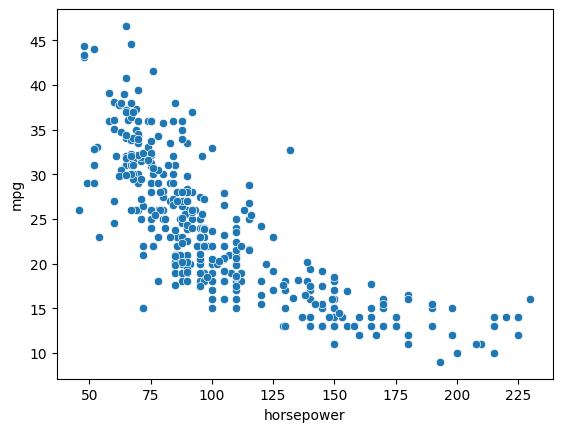

In [81]:
# Le graphe entre ces deux variables
sns.scatterplot(data=df, x=df['horsepower'], y=df['mpg'])

In [82]:
# La corrélation de Pearson entre ces deux variables
from scipy.stats import pearsonr

r, p_value = pearsonr(x=df['horsepower'], y=df['mpg'])

print(f"Le coef de pearson entre ces deux variables est : {r.round(2)}")
print(f"p_value : {p_value}")

Le coef de pearson entre ces deux variables est : -0.78
p_value : 7.031989029405005e-81


La probabilité d'obtenir une telle corrélation ou plus,  si les deux variables étaient totalement indépendantes, est 7.031989029405005e-81. 
Cette probabilité étant extrêmement faible, nous concluons qu'il existe une association statistiquement significative entre mpg et horsepower

2) Peut-on affirmer avec un risque d'erreur de 2% que les voitures du Japon, d'Europe, et des États-Unis ont vu leur autonomie moyenne (mpg) augmenter entre la premiere moitiée des années 70s, et la seconde moitiée des années 70s ?

Conditions d'utilisations de test t:
  - Données indépendantes et 
  - Données suit une loi normale ou (plus de 30 points)
  - La variances des deux goupes très proches

<Axes: xlabel='model_year', ylabel='mpg'>

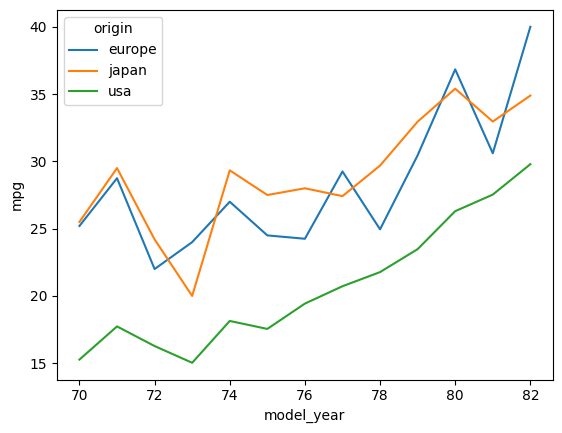

In [113]:
sns.lineplot(data=df.groupby(['model_year', 'origin'])['mpg'].mean().reset_index(), x='model_year', y='mpg', hue='origin')

H0 : L'autonomie des voitures du Japan, d'Europe, des USA n'a pas augmenté ente la 1er et la 2eme moitie des années 70.

alpha = 0.02

In [130]:
japon_75 = df.query("origin=='japan' & model_year<=75")[['model_year', 'mpg']]
japon_80 = df.query("origin=='japan' & model_year>75 & model_year<=80")[['model_year', 'mpg']]

alpha = 0.02

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(a=japon_75['mpg'], b=japon_80['mpg'])

if p_value < alpha:
    print(f"Nous avons suffisamment d'évidences pour rejeter H0")
else:
    print("Nous n'avons pas suffisamment d'évidences pour rejeter H0")

Nous avons suffisamment d'évidences pour rejeter H0


L'autonomie moyenne des voitures du Japon augmente significativement entre la 1er moitie et la 2eme moitie des années 70.

In [135]:
usa_75 = df.query("origin=='usa' & model_year<=75")[['model_year', 'mpg']]
usa_80 = df.query("origin=='usa' & model_year>75 & model_year<=80")[['model_year', 'mpg']]

alpha = 0.02

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(a=usa_75['mpg'], b=usa_80['mpg'])

if p_value < alpha:
    print(f"Nous avons suffisamment d'évidences pour rejeter H0")
else:
    print("Nous n'avons pas suffisamment d'évidences pour rejeter H0")

Nous avons suffisamment d'évidences pour rejeter H0


L'autonomie moyenne des voitures des États-Unis augmente significativement entre la 1er moitie et la 2eme moitie des années 70.

In [138]:
euro_75 = df.query("origin=='europe' & model_year<=75")[['model_year', 'mpg']]
euro_80 = df.query("origin=='europe' & model_year>75 & model_year<=80")[['model_year', 'mpg']]

alpha = 0.02

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(a=euro_75['mpg'], b=euro_80['mpg'])

if p_value < alpha:
    print(f"Nous avons suffisamment d'évidences pour rejeter H0")
else:
    print("Nous n'avons pas suffisamment d'évidences pour rejeter H0")

Nous avons suffisamment d'évidences pour rejeter H0


L'autonomie moyenne des voitures d'Europe augmente significativement entre la 1er et 2eme moitie des années 70.